In [1]:
from src.Sonufy import *
from src.AudioDataGenerator import AudioDataGenerator
import matplotlib.pyplot as plt

In [75]:
adg = AudioDataGenerator(batch_size=32, input_size=(64,1030), output_size=(64,64), directory='data/mels', shorten_factor=2)

Found 49958 files for prediction set


In [76]:
sonufy = Sonufy(latent_dims=128, output_size=(64,64), final_shorten_factor=2)

In [4]:
sonufy.build_model(filters=(16,32,64))

In [61]:
sonufy.train(mel_directory='data/mels', epochs=10, train_test_split=.02, batch_size=128)

Found 46572 files for training set
Found 951 files for testing set
Epoch 1/10
363/363 [==============================] - 94s 257ms/step - loss: 0.0057 - val_loss: 0.0057
Epoch 2/10
363/363 [==============================] - 96s 264ms/step - loss: 0.0056 - val_loss: 0.0056
Epoch 3/10
363/363 [==============================] - 99s 271ms/step - loss: 0.0056 - val_loss: 0.0055
Epoch 4/10
363/363 [==============================] - 98s 271ms/step - loss: 0.0056 - val_loss: 0.0056
Epoch 5/10
363/363 [==============================] - 98s 269ms/step - loss: 0.0056 - val_loss: 0.0054
Epoch 6/10
363/363 [==============================] - 94s 260ms/step - loss: 0.0055 - val_loss: 0.0054
Epoch 7/10
363/363 [==============================] - 92s 253ms/step - loss: 0.0055 - val_loss: 0.0054
Epoch 8/10
363/363 [==============================] - 92s 253ms/step - loss: 0.0055 - val_loss: 0.0058
Epoch 9/10
363/363 [==============================] - 91s 249ms/step - loss: 0.0055 - val_loss: 0.0056
Epoch 

In [77]:
# sonufy.save_encoder('data/test_128dim_newmels')
sonufy.load_encoder('data/test_128dim_newmels')
sonufy.build_vectors_from_model(mel_directory='data/mels', all_tracks_file='data/all_tracks_shuffled.feather')
sonufy.save('data/test_128dim_newmels')

Getting predictions from autoencoder...


INFO: Applying 1 TensorFlow Lite delegate(s) lazily.


[============================================================>] 50015 / 50015

2.69 minutes elapsed
Building tracks dataframe...
Track dataframe built. 0.07 minutes elapsed
Building genre distributions...
[============================================================>] 50015 / 50015

Genre distributions built. 0.26 minutes elapsed
Latent Space Built.
failed to save full model
failed to save encoder
saved database files
Saved full model, encoder, and database files in data/test_128dim_newmels.


In [80]:
sonufy.load_full_model('data/test_128dim_newmels/')

Autoencoder loaded from "data/test_128dim_newmels/".


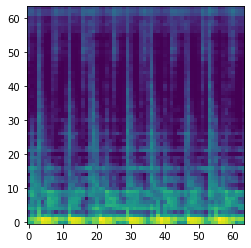

In [81]:
test_img = adg.take(3)[0]

plt.imshow(test_img[0], origin='lower')

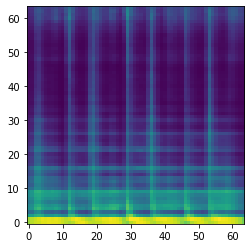

In [82]:
plt.imshow(sonufy.autoencoder(test_img)[0], origin='lower')

In [89]:
a, b, c, d = sonufy.search_for_recommendations(query='miranda the beat im not your baby', get_time_and_freq=True)

/Users/michaelroth/miniforge3/envs/golden_env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [90]:
a['name']

"I'm Not Your Baby"

In [91]:
b

,track_name,track_uri,artist_name,similarity,track_popularity,time_similarity,frequency_similarity
0,Show Luv,spotify:track:2SbAcN6cMTrtGeTFA5rqDe,Norman Doray,0.660897,47,0.562613,0.721256
1,Bütün Bunlar Düş,spotify:track:1hfbYajgvpuxEfRc4CS4Ha,Grizu,0.659068,29,0.572616,0.746341
2,Phantom Surfer,spotify:track:6p0mV7Z8wp72S4Yje9y0JO,The Tornadoes,0.658832,13,0.598454,0.684735
3,Livin' on Livin' - Remastered,spotify:track:5ZfxcD6566VPqaoi4plbuQ,Lords Of The New Church,0.658427,17,0.531939,0.738830
4,La Corrida - Radio Edit,spotify:track:1D4cwJylq9njeGZ8XbiTqn,Stage Rockers,0.657795,18,0.538076,0.713320
5,Tenth of Eleven Child,spotify:track:2H3gLI1ZxDj9did37atwRj,Louie Anderson,0.657764,17,0.470789,0.724196
6,Ronnie's Song,spotify:track:0PxDHhVLWXUsrmbBKaEP11,Jimmie Van Zant Band,0.645535,17,0.668624,0.645492
7,Switch It,spotify:track:2wOPoAiNCFiIWBKpUxyUUL,Robbie Rivera,0.645407,47,0.586550,0.719956
8,pogo,spotify:track:404b6bC4GIxPsNssJmfC1f,Diplo,0.643643,70,0.542660,0.715875
9,Our Life is Your Death,spotify:track:3EJh3uKp52NCP10bPlSBRX,Deathspell Omega,0.641465,24,0.590884,0.744100


In [92]:
similarity_img = np.concatenate([np.array(d), np.array(c[sonufy.latent_cols])])

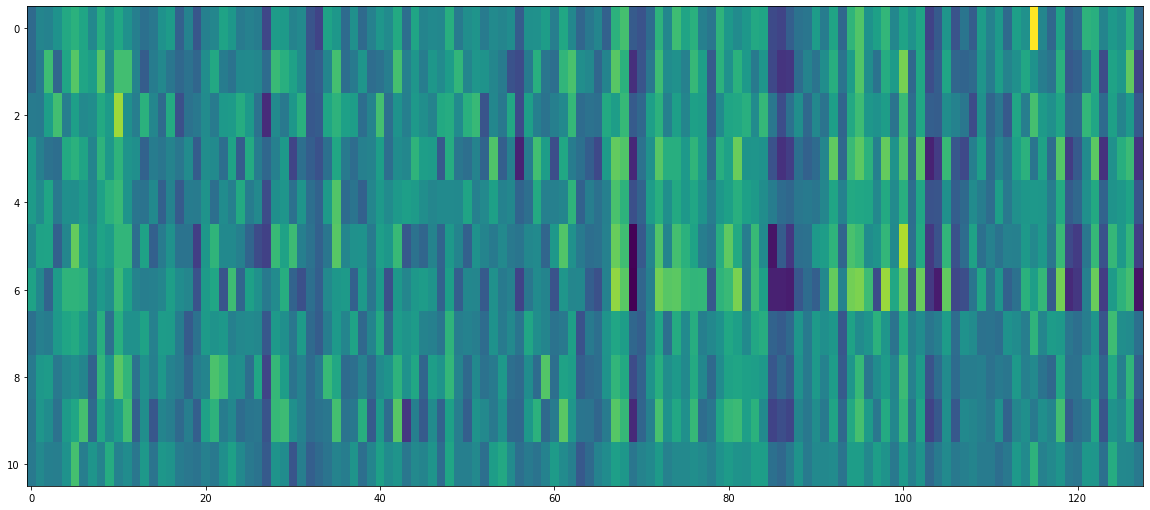

In [93]:
plt.figure(figsize=(20,10))
plt.imshow(similarity_img, aspect=5)

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [71]:
mean_squared_error(test_img[0].reshape(64,64), np.array(sonufy.autoencoder(test_img)[0]).reshape(64,64))

0.008464583422193032